🎞 Dataset Preview:
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Sidd

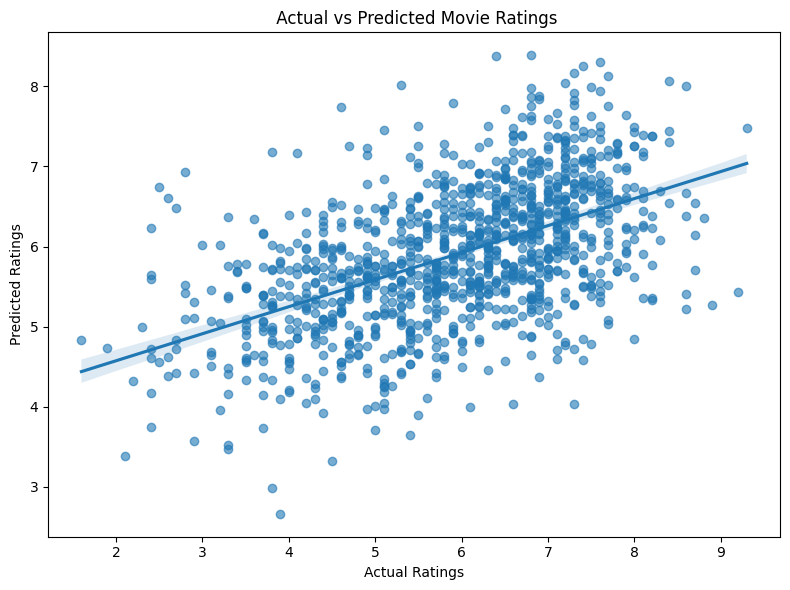

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


try:
    df = pd.read_csv("IMDb Movies India.csv", encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv("IMDb Movies India.csv", encoding='latin1')


df.columns = df.columns.str.strip()


print("🎞 Dataset Preview:")
print(df.head())
print("\n Data Info:")
print(df.info())


df.dropna(inplace=True)


target_column = 'Rating'
categorical_columns = df.select_dtypes(include='object').columns.tolist()


if target_column in categorical_columns:
    categorical_columns.remove(target_column)


df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)


df_encoded[target_column] = pd.to_numeric(df_encoded[target_column], errors='coerce')


df_encoded.dropna(subset=[target_column], inplace=True)


X = df_encoded.drop([target_column], axis=1)
y = df_encoded[target_column]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("\nEvaluation Metrics:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# Visualize predictions
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha': 0.6})
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title(" Actual vs Predicted Movie Ratings")
plt.tight_layout()
plt.show()